In [1]:
!pip install tweepy

In [2]:
!pip install configparser

In [1]:
import tweepy
import configparser
import pandas as pd


### Authentication Handling

In [3]:
config = configparser.RawConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret =  config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)



#### Python environment setup

In [5]:
#!pip install requests
#!pip install searchtweets

In [4]:
import requests
import json
import datetime
bearer_token = config['twitter']['bearer_code']
start_time = datetime.datetime(2021,3,9)
end_time = datetime.datetime.now(datetime.timezone.utc)

In [5]:
end_time.isoformat()
start_time.isoformat()

'2021-03-09T00:00:00'

In [6]:

Client = tweepy.Client(bearer_token=bearer_token)

# Code to search recent searches limit - 10 to 100
# twts_all = Client.search_recent_tweets('S&P-500', end_time = end_time, start_time= start_time, max_results = 100)


In [7]:
auth = tweepy.OAuthHandler(consumer_key = api_key, consumer_secret=api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


Searching on the twitter with query q using api.

In [8]:
search_reults = api.search_tweets(q = 'S&P-500', lang = 'en', result_type = 'popular', count = 10, tweet_mode="extended")

In [9]:
json_data = [r._json for r in search_reults]
df = pd.json_normalize(json_data)

In [15]:
df.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,user.profile_text_color,user.profile_use_background_image,user.has_extended_profile,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,user.withheld_in_countries
0,Mon Mar 14 00:32:30 +0000 2022,1503167151020158976,1503167151020158976,The S&amp;P 500 is down 11.8% in the first 48 ...,False,"[0, 264]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,333333,True,False,False,False,False,False,False,none,[]
1,Mon Mar 14 00:41:36 +0000 2022,1503169441059725321,1503169441059725321,"It feels much worse, but the S&amp;P 500's 13%...",False,"[0, 146]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,333333,True,False,False,False,False,False,False,none,[]
2,Mon Mar 14 04:21:43 +0000 2022,1503224834817671168,1503224834817671168,MSCI China’s risk premium vs the S&amp;P 500 h...,False,"[0, 91]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,333333,True,True,True,False,False,False,False,none,[]
3,Mon Mar 14 02:39:47 +0000 2022,1503199181728534528,1503199181728534528,The S&amp;P 500 gained 266% during Tom Brady's...,False,"[0, 132]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,333333,True,False,True,False,False,False,False,none,[]
4,Mon Mar 14 16:40:14 +0000 2022,1503410687502082048,1503410687502082048,⚠️BREAKING:\n\n*NASDAQ 100 HITS LOW OF THE DAY...,False,"[0, 108]","<a href=""http://twitter.com/download/android"" ...",None,None,None,...,333333,True,False,False,False,False,False,False,none,[]
5,Mon Mar 14 09:55:01 +0000 2022,1503308712903155713,1503308712903155713,"⚠️BREAKING:\n\n*DOW FUTURES UP 1.1%, S&amp;P 5...",False,"[0, 113]","<a href=""http://twitter.com/download/android"" ...",None,None,None,...,333333,True,False,False,False,False,False,False,none,[]
6,Sun Mar 13 21:43:23 +0000 2022,1503124590494728197,1503124590494728197,🚨BELOW ALL-TIME HIGHS:\n\n*DOW: -10.7%\n*S&amp...,False,"[0, 121]","<a href=""https://studio.twitter.com"" rel=""nofo...",None,None,None,...,333333,True,False,False,False,False,False,False,none,[]
7,Sun Mar 13 22:21:20 +0000 2022,1503134140912263172,1503134140912263172,"S&amp;P 500, Nasdaq &amp; Dow futures all open...",False,"[0, 64]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,333333,True,False,True,False,False,False,False,none,[]
8,Sun Mar 13 17:56:08 +0000 2022,1503067401507778561,1503067401507778561,Goldman Sachs has lowered its S&amp;P 500 targ...,False,"[0, 77]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,333333,True,False,True,False,False,False,False,none,[]
9,Mon Mar 14 20:04:35 +0000 2022,1503462113007841284,1503462113007841284,The S&amp;P 500 fell on Monday to kick off an ...,False,"[0, 266]","<a href=""http://wildmoka.com"" rel=""nofollow"">W...",None,None,None,...,333333,True,False,False,False,False,False,False,none,[]


In [14]:
for i in range(10):
    print("************** ", i," **************" )
    print(df.iat[i,3])

**************  0  **************
The S&amp;P 500 is down 11.8% in the first 48 trading days of 2022, the 4th worst start to a year in history.

The worst 5 starts prior to this year (2009, 2020, 1935, 1933, &amp; 1982) all mounted tremendous comebacks to end the year in strong positive territory. https://t.co/hNDk3tGSZd
**************  1  **************
It feels much worse, but the S&amp;P 500's 13% max drawdown this year is right in line with the median intra-year drawdown since 1928 (-13%). $SPX https://t.co/VXMwQ7wtzE
**************  2  **************
MSCI China’s risk premium vs the S&amp;P 500 has surged to the highest in almost six years. https://t.co/dmxTmmKiFC
**************  3  **************
The S&amp;P 500 gained 266% during Tom Brady's playing career. It lost 7.5% in the short time he was retired. Welcome back @TomBrady https://t.co/QzyNmTgUkq
**************  4  **************
⚠️BREAKING:

*NASDAQ 100 HITS LOW OF THE DAY, DOWN MORE THAN 1%; S&amp;P 500 ERASES GAIN AS TECH 

#### Dataset preparation

I have used the dataset for the tweets from this source: [Stock Market Tweet | Sentiment Analysis lexicon](https://datasetsearch.research.google.com/search?src=0&query=stock%20market%20tweet&docid=L2cvMTFsbDY3dzZzag%3D%3D)

In [13]:
dfLabelled = pd.read_csv('tweets_labelled_09042020_16072020.csv', sep = ';')
dfLabelled.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


I will use the remaining dataframe and apply sentiment analysis to obtain the sentiment from the tweet. 

In [75]:
import numpy as np
import os
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pprint import pprint
from datetime import datetime
import collections
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from time import sleep
from tqdm import tqdm


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
 50%|█████     | 5/10 [00:18<00:18,  3.61s/it]


KeyboardInterrupt: 

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud

In [74]:
dfRemaining = pd.read_csv('tweets_remaining_09042020_16072020.csv', sep = ';').set_index('id')
dfRemaining.head()

,created_at,full_text
id,,
1,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...
2,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...
3,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...
4,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...
5,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...


In [110]:
dfRemaining.tail()

,created_at,full_text
id,,
938668,2020-07-16 00:00:25+00:00,RT @MadMraket: We tend to spend lot of time in...
938669,2020-07-16 00:00:23+00:00,You \n\n$SPX $SPY #ES_F
938670,2020-07-16 00:00:23+00:00,"$KO Coca-Cola #Options #maxpain Chart, Open In..."
938671,2020-07-16 00:00:06+00:00,Here's a dividends watchlist \nfor the 01/04/0...
938672,2020-07-16 00:00:00+00:00,$AAL $TWTR $SPCE $AZN $ERI $RCL $JNJ $AA $SNBR...


#### Quick view of the full tweets  

In [76]:
for i in tqdm(range(5)):
    pprint(dfRemaining.iat[i,1])

100%|██████████| 5/5 [00:00<00:00, 625.68it/s]

("@KennyDegu very very little volume. With $10T you'd think they could have "
 '$SPX  trading at 10,000 by now.')
('#ES_F achieved Target 2780 closing above 50% #Fibonacci  level, momentum '
 'still up. possible push towards 2842-2886 next week. $SPX $SPY  #tradign '
 '#futures https://t.co/wD2A0102nC')
('RT @KimbleCharting: Silver/Gold indicator creates one of the largest bullish '
 'reversal patterns in decades while testing multi-decade suppor…')
('@Issaquahfunds Hedged our $MSFT position into close. Seemed to be getting '
 'lazy over this past week.')
("RT @zipillinois: 3 Surprisingly Controversial Stocks in Donald Trump's "
 'Portfolio @themotleyfool #stocks $GILD $MO https://t.co/d9hlJnSRN3')


In [77]:
cols = dfRemaining.shape[0]
cols

923673

In [ ]:
dfRemaining_ = dfRemaining[:int(cols*0.01)]
dfRemaining_.shape

(9236, 2)

In [79]:
dfRemaining_ = dfRemaining

In [81]:
tick_re = re.compile(r'(^\$[A-Z,&,0-9]{1,6})')
hash_re = re.compile(r'#\w+')

tick_dic = collections.defaultdict(int)
hash_dic = collections.defaultdict(int)

for t in tqdm(dfRemaining_['full_text']):
    for w in t.split():
        if tick_re.fullmatch(w):
            tick_dic[w[1:]] += 1
        
        w = w.lower()
        if hash_re.fullmatch(w):
            hash_dic[w] +=1

100%|██████████| 923673/923673 [01:42<00:00, 9034.34it/s] 


In [82]:
tick_df = pd.DataFrame.from_dict(tick_dic, orient = 'index').rename(columns={0: 'count'}).sort_values('count',ascending = False)
tick_df.head()

,count
SPX,131745
AAPL,91959
SPY,86173
AMZN,81800
FB,66527


In [83]:
word_df = pd.DataFrame.from_dict(hash_dic,orient='index').rename(columns={0:'count'}).sort_values('count', ascending = False)
word_df.head()

,count
#stocks,254921
#stockmarket,63690
#trading,58899
#investing,54481
#investment,23150


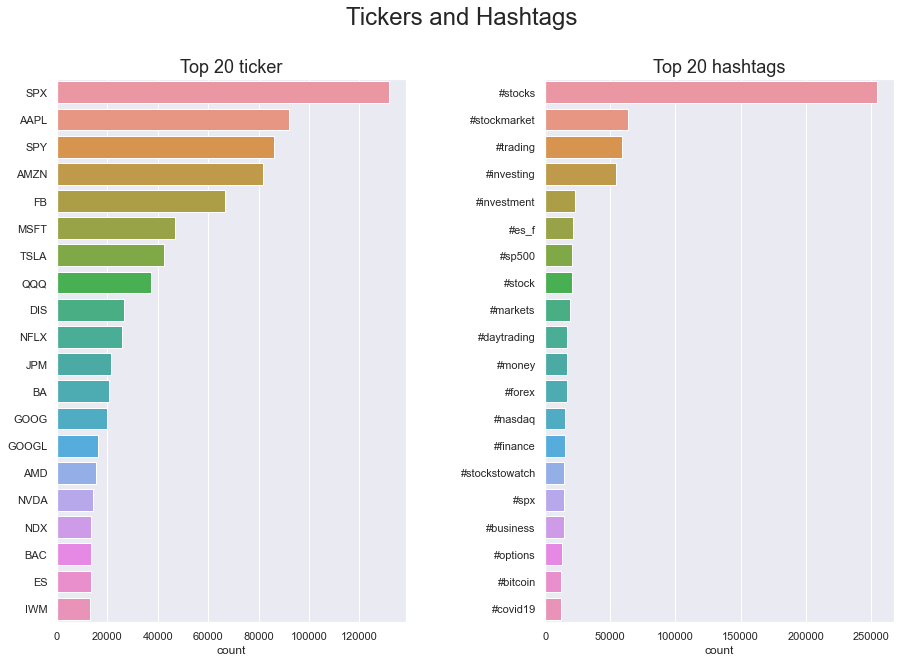

<Figure size 1800x1200 with 0 Axes>

In [84]:
fig, ax = plt.subplots(1,2, figsize = (15,10) )
plt.rc('font', size = 20)

plt.suptitle('Tickers and Hashtags', )
plt.subplots_adjust(wspace=0.4)

sns.set(font_scale = 1.5)
sns.barplot(x = tick_df['count'][:20], y = tick_df.index[:20], ax = ax[0])
ax[0].set_title('Top 20 ticker')

sns.barplot(x = word_df['count'][:20], y = word_df.index[:20], ax = ax[1])
ax[1].set_title('Top 20 hashtags')

plt.figure(dpi = 300);

### Preprocessing the wordCloud now

* Instead of deleting the emoji I will convert it into text and use it as a feature for SA.
* Removing the urls.
* Performing Lemmatization
* deleting the stop words.

##### Handling emojis now

In [100]:
# !pip install emot
# !pip install numba
import re
import pickle
import timeit
from numba import jit

from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS



In [86]:
with open('Emoji_Dict.p', 'rb') as fp:
    emoj_dic = pickle.load(fp)
emoj_dic = {v:k for k, v in emoj_dic.items()}


def emo_to_text(text):
    for e in emoj_dic:
        text = re.sub(r'('+e+')', "_".join(emoj_dic[e].replace(",", " ").replace(':', " ").split()), text)
    return text


checking the functionality of emo_to_text() on tweets:

In [87]:
dfRemaining_['full_text'][13]

'RT @TDANetwork: 📽️ #TheWatchList panel assesses the big questions $AAPL will face over the next 6 months. 🍎📱\n\n@LanceUlanoff and @mattswider…'

In [104]:
emo_to_text(dfRemaining['full_text'][13])

'RT @TDANetwork: film_projector️ #TheWatchList panel assesses the big questions $AAPL will face over the next 6 months. red_applemobile_phone\n\n@LanceUlanoff and @mattswider…'

Converting all the tweet --> emoji to text

In [108]:
dfRemaining_['full_text'][:2].apply(emo_to_text)

id
1    @KennyDegu very very little volume. With $10T ...
2    #ES_F achieved Target 2780 closing above 50% #...
Name: full_text, dtype: object

In [109]:
dfRemaining_.shape

(923673, 2)

In [105]:
start = timeit.default_timer()
dfRemaining_ = dfRemaining_['full_text'][1].apply(emo_to_text)
check1 = timeit.default_timer()
dfRemaining_.to_csv('updated_emoji_replaced_text.csv', encoding = 'utf-8')
check2 = timeit.default_timer()

print('Time taken to complete emoji conversion: ', check1 - start) 

AttributeError: 'str' object has no attribute 'apply'

In [ ]:
char_re = re.compile(r'[^a-zA-Z\s]') # keeps a-z, A-Z & space symbols
handle_re = re.compile(r'@\w+') # detects the handles starting with @
url_re = re.compile(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
pic_re = re.compile(r'pic\.twitter\.com/.{10}')
spl_re = re.compile(r'(&amp;|&gt;|&lt;)') #special signs
tag_re = re.compile(r'<.*?>')

Handling Stopwords

stopwords = set(stopwords.words('english')).union({'rt', 'retweet', 'RT', 'Retweet', 'RETWEET'})

Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def hashtag(t):
    return hash_re.sub(' ', t)

def remove_ticker(phrase):
    return tick_re.sub('', phrase)
    
def specialcode(phrase):
    return spl_re.sub(' ', phrase)

# def emoji(phrase):
#     return emoji_re.sub(' ', phrase)

def url(phrase):
    return url_re.sub('', phrase)

def pic(phrase):
    return pic_re.sub('', phrase)

def html_tag(phrase):
    return tag_re.sub(' ', phrase)

def handle(phrase):
    return handle_re.sub('', phrase)

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # DIS, ticker symbol of Disney, is interpreted as the plural of "DI" 
    # in WordCloud, so I converted it to Disney
    phrase = re.sub('DIS', 'Disney', phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"(he|He)\'s", "he is", phrase)
    phrase = re.sub(r"(she|She)\'s", "she is", phrase)
    phrase = re.sub(r"(it|It)\'s", "it is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"(\'ve|has)", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase